# Chapter 5. Performance Evaluation

**참고**
https://bigdaheta.tistory.com/53?category=965501
https://greenjun.github.io/data%20mining/Performance-Evaluation/

**복습**

- 지도학습(Supervised Learning)

    - 정답을 알려주며 학습시키는 것. 즉, 데이터와 레이블을 함께 학습시키는 것.
    - Goal: Predict a single targe(outcome) variable
    
    - **분류(classification)**
        - Goal: Predict a categorical target variable

    - **예측(prediction)**
        - Goal: Predict a numerical target variable
        - regression

In [7]:
#import required functionality for this chapter

#pandas for data handling
#statsmodels for regression models
#scikit-learn for performance metrics
#matplotlib for visualization
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

## 5.1 Introduction

### Performance Evaluation (모델 성능 평가)

한개의 데이터 셋에 대해서도 사용할 수 있는 모델의 수가 굉장히 많습니다. 따라서 모델을 만든 후에 어떤 모델이 좋은 지 확인하는 과정이 필요합니다. 그래서 모델을 평가하는 성과분석(performance analysis)를 하게 됩니다.

- Evaluation metrics are important 1) for comparing across DM models, 2) for choosing the right configuration of a specific DM model, and 3) for comparing to the baseline
- Major metrics: confusion matrix, error rate, predictive error
- Other metrics when one class is more important, OR asymmetric costs
- When important class is rare, use **oversampling**
- In all cases, metrics computed from **validation data**


### Performance measures (성과 분석 척도)
- Prediction performance (Section 5.2) 
    - **Average Error, MAPE, RMSE**
- Classification performance (based on classification matrix) (Section 5.3)
    - **Overall accuracy, specificity, sensitivity, ROC curve**
    - Classification is aimed at predicting class membership for new records. 
- Ranking performance (Section 5.4)
    - **Lift and Decile chart**
    - Ranking is detecting among a set of new records the ones most likely to belong to a class of interest.
- Oversampling


### Three types of outcomes
1. Predicted numerical value: when the outcome variable is numerical (e.g., house price)
2. Predicted class membership: when the outcome variable is categorical (e.g., buyer/nonbuyer)
3. Propensity: the probability of class membership, when the outcome variable is categorical (e.g., the propensity to default)


### Why evaluating?
- Multiple methods are available to classify or predict
- For each method, multiple choices are available for settings
- To choose best model, need to assess each model’s performance

## 5.2 Evaluating Predictive Performance (예측성능의 평가)

#### 1. The Naive Benchmark : The Average

The benchmark criterion in prediction is using the average outcome value (thereby ignoring all predictor information). In other words, the prediction for a new record is simply the average across the outcome values of the records in the training set.

- 나이브 규칙(Naïve rule); 분류기의 성능을 평가하기 위한 기준선(benchmark).
- 예측에서 benchmark로 `평균`을 사용함으로써 모든 예측기 정보를 무시한다.


#### 2. Prediction Accuracy Measures

For assessing prediction performance, several measures are used. In all cases, the measures are based on the **validation set**, which serves as a more objective ground than the training set to assess predictive accuracy. This is because records in the validation set are more similar to the future records to be predicted.

We want to know how well the model predicts new data, so measure `predictive error`.
The prediction error for record i is defined as the difference between its actual outcome value and its predicted outcome value: ei = yi-ŷi

- MAE or MAD: Mean absolute error (deviation)
- Average error: Retains the sign of errors
- MAPE: Mean absolute percentage error
- RMSE (root-mean-squared-error)
- Total SSE:  Total sum of squared errors

모든 척도들은 outlier에 의해 영향받는다. outlier의 영향을 점검하기 위해서 중간값 기반 척도들을 계산하거나 단순히 그 오류들의 히스토그램이나 box plot을 그린다. 높은 예측 정확도를 갖는 모형이 학습 데이터를 최상으로 적합하는 모형과 일치하지 않을 수 있다는 것에 유의하는 것이 중요하다.(ei = yi-ŷi)


#### 3. Comparing Training vs. Validation Performance

Errors that are based on the **training set** tell us about model fit, whereas errors that are based on the **validation set** (called “`prediction errors`”) measure the model’s ability to predict new data(predictive performance). We expect training errors to be smaller than the validation errors (because the model was fitted using the training set), and the more complex the model, the greater the likelihood that it will overfit the training data (indicated by a greater difference between the training and validation errors).

- Residuals over training set: ET
    - Model fit

- Residuals over validation set: EV
    - Model’s ability to predict new data

- ET < EV
    - Greater difference -> more overfit to the training data



#### 4. Lift Chart (=cumulative gains chart)

- Search for a subset of records that gives the highest cumulative predicted values

- Compare model’s predictive performance to a baseline model without predictors

- Y axis is cumulative value of numeric target variable (e.g., revenue), instead of cumulative count of “responses”

- Evaluates how well a model identifies the most important class

In [8]:
##Prediction error metrics from a model for Toyota car prices. Training and validation
#code for accuracy measure

# Reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = pd.read_csv('ToyotaCorolla.csv')

# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')
predictors = [s for s in car_df.columns if s not in excludeColumns]
outcome = 'Price'

# partition data
X = car_df[predictors]
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

# evaluate performance (accuracy measure)
# training
regressionSummary(train_y, reg.predict(train_X))
# validation
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1121.1557
            Mean Absolute Error (MAE) : 811.5299
          Mean Percentage Error (MPE) : -0.8633
Mean Absolute Percentage Error (MAPE) : 8.0040

Regression statistics

                      Mean Error (ME) : 96.9035
       Root Mean Squared Error (RMSE) : 1385.5390
            Mean Absolute Error (MAE) : 881.4138
          Mean Percentage Error (MPE) : 0.0113
Mean Absolute Percentage Error (MAPE) : 8.8828


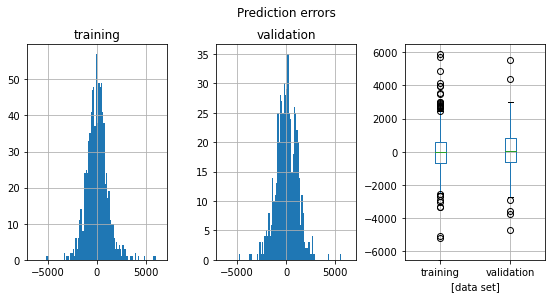

In [11]:
#Histograms and boxplots of Toyota price prediction errors, for training and validation sets
%matplotlib inline
pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_X),
    'data set': 'training'
})
pred_error_valid = pd.DataFrame({
    'residual': valid_y - reg.predict(valid_X),
    'data set': 'validation'
})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index=True)
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9, 4)
common = {'bins': 100, 'range': [-6500, 6500]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-6500, 6500)
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

The cumulative gains and lift charts are based on ordering the set of records of interest (typically validation data) by their predicted value, from high to low. Then, we accumulate the actual values and plot their cumulative value (=gains) on the y-axis as a function of
the number of records accumulated (the x-axis value).

This is the `cumulative gains curve`. This curve is compared to assigning a naive
prediction to each record and accumulating these average values, which results in a diagonal line. 

The further away the cumulative gains curve from the diagonal benchmark line, the better the model is doing in separating records with high value outcomes from those with low value outcomes.


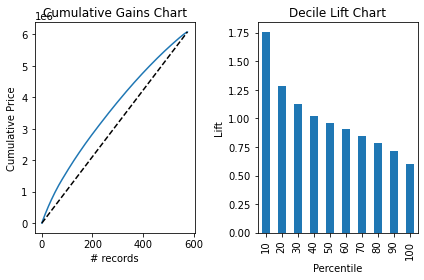

In [12]:
#Cumulative gains chart (a) and decile lift chart (b) for continuous outcome variable (sales of Toyota cars)
pred_v = pd.Series(reg.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

It shows a cumulative gains chart and decile lift chart based on fitting a linear regression model to the Toyota data. The charts are based on the validation data of 575 cars. 

(a)
It can be seen that the model’s predictive performance in terms of gains is better than the baseline model, since its cumulative gains curve is higher than that of the baseline model.
(실선: spending when sorted using predicted values , 점선: spending using average)

(b)
The charts in Figure 5.2 would be useful in the following scenario: choosing the top 10% of the cars that gave the highest predicted sales, for example, we would gain 1.75 times
the amount of revenue, compared to choosing 10% of the cars at random. 


## 5.3 Judging Classifier Performance (분류성능의 평가)

A natural criterion for judging the performance of a classifier is the probability of making a `misclassification error`. 

- Misclassification : Observation belongs to one class but the model classifies it as a member of a different class

- Misclassification error
    - Error = classifying a record as belonging to one class when it belongs to another class
    - Error rate = percentage of misclassified records out of the total records in the validation data


### 1. Benchmark: The Naive Rule

The naive rule is used mainly as a baseline or benchmark for evaluating the
performance of more complicated classifiers.

Naïve rule:  classify all records as belonging to the most prevalent class without any predictor information

Similar to using the sample `mean` as the naive benchmark in the numerical outcome case, the naive rule for classification relies solely on the `y` information and excludes any additional predictor information.

Exception: when goal is to identify high-value but rare outcomes, we may do well by doing worse than the naïve rule


### 2. Class Separation

If the classes are well separated by the predictor information, even a small dataset will suffice in finding a good classifier. 

- “High separation of records” means that using predictor variables attains low error :)
- “Low separation of records” means that using predictor variables does not improve much on naïve rule :(



Panel (a) includes a small dataset (n = 24 records) where two
predictors (income and lot size) are used for separating owners
from nonowners. Here, the predictor
information seems useful in that it separates the two classes
(owners/nonowners).


Panel (b) shows a much larger dataset (n =
5000 records) where the two predictors (income and monthly
average credit card spending) do not separate the two classes well in
most of the higher ranges (loan acceptors/nonacceptors).


### 3. The Confusion (Classification) Matrix

In practice, most accuracy measures are derived from the confusion matrix, also called classification matrix. This matrix summarizes the correct and incorrect classifications that a classifier produced for a certain dataset. Rows and columns of the confusion matrix correspond to the predicted and true (actual) classes, respectively.

The confusion matrix gives estimates of the true classification and `misclassification rates`.


### 4. Using the Validation Data

To obtain an honest estimate of future classification error, we use the confusion matrix that is computed from the **validation data**. 

In other words, we first partition the data into training and validation sets by random selection of records. -> We then construct a classifier using the training data, and then apply it to the validation data. -> This will yield the predicted classifications for records in the validation set. -> We then summarize these classifications in a confusion matrix. Although we can summarize our results in a confusion matrix for **training data** as well, the resulting confusion matrix is not useful for getting an honest estimate of the misclassification rate for new data due to the danger of `overfitting`.
-> In addition to examining the **validation data** confusion matrix to assess the classification performance on new data, we compare the **training data** confusion matrix to the **validation data** confusion matrix, in order to detect overfitting: although we expect somewhat inferior results on the validation data, a large discrepancy in training and validation performance might be indicative of overfitting.


### 5. Accuracy Measures

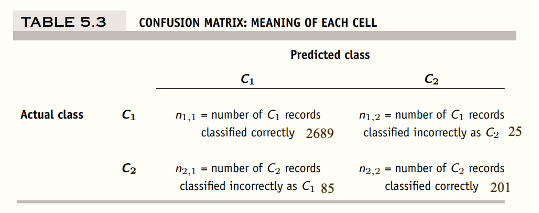

- Overall error rate = (85+25)/3000 = 3.67%
- Accuracy = 1 – error = (2689+201)/3000 = 96.33%
- In multiple classes, error rate is: (sum of misclassified records) / (total records)


### 6. Propensities and Cutoff for Classification

Most DM algorithms classify via a 2-step process:
For each record,
1. Compute probability of belonging to class “1”
2. Compare to cutoff value, and classify accordingly

- Default cutoff value is 0.5
- If >= 0.5, classify as “1”
- If < 0.5, classify as “0”
- Can use different cutoff values
- Typically, error rate is lowest for cutoff = 0.5

We can adjust the cutoff value in such a case to classify more records as the high-value class, that is, accept more misclassifications where the misclassification cost is low.


### 7. Performance in Case of Unequal Importance of Classes : Use Alternative Accuracy Measures


If “C1” is the important class,

- Sensitivity (also called ‘recall’) = % of “C1”(important class) correctly classified
- Specificity = % of “C0” class correctly classified

- False positive rate = % of predicted “C1’s” that were not “C1’s”
- False negative rate = % of predicted “C0’s” that were not “C0’s”

- Precision = % of predicted “C1’s” that are actually “C1’s”


### 7.1 ROC curve
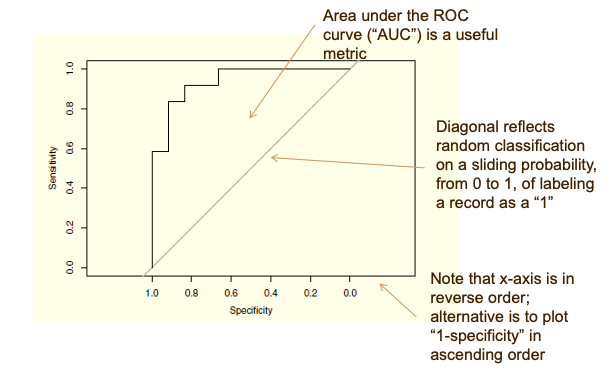
A more popular method for plotting the two measures is through ROC (Receiver Operating Characteristic) curves. Starting from the lower left, the ROC curve plots the pairs {sensitivity, specificity} as
the cutoff value descends from 1 to 0.

Better performance is reflected by curves that are closer to the top-left corner.

In [16]:
#Confusion matrices based on cutoffs of 0.5, 0.25, and 0.75

from dmba import classificationSummary

owner_df = pd.read_csv('ownerExample.csv')
## cutoff = 0.5
predicted = ['owner' if p > 0.5 else 'nonowner' for p in
owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

## cutoff = 0.25
predicted = ['owner' if p > 0.25 else 'nonowner' for p in
owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

## cutoff = 0.75
predicted = ['owner' if p > 0.75 else 'nonowner' for p in
owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])


Confusion Matrix (Accuracy 0.8750)

         Prediction
  Actual nonowner    owner
nonowner       10        2
   owner        1       11
Confusion Matrix (Accuracy 0.7917)

         Prediction
  Actual nonowner    owner
nonowner        8        4
   owner        1       11
Confusion Matrix (Accuracy 0.7500)

         Prediction
  Actual nonowner    owner
nonowner       11        1
   owner        5        7


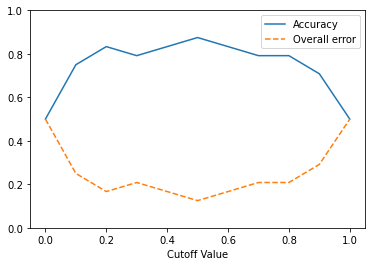

In [17]:
#Accuracy and overall error as a function of the cutoff value

df = pd.read_csv('liftExample.csv')

cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in df.prob]
    accT.append(accuracy_score(df.actual, predicted))
line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1 - acc for acc in accT], '--', label='Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])
plt.show()

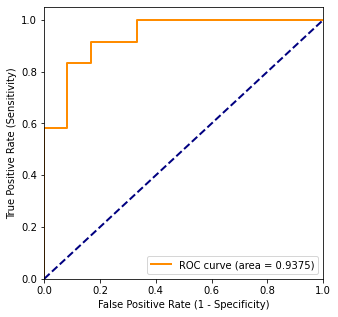

In [18]:
# generating ROC curve and computing AUC

from sklearn.metrics import roc_curve, auc
# compute ROC curve and AUC
fpr, tpr, _ = roc_curve(df.actual, df.prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

## 5.4 Judging Ranking Performance


### Gains and Lift Charts for Binary Data

We already introduced cumulative gains charts and lift charts in the context of a numerical outcome (Section 5.2). We now describe these charts for a **binary outcome**. This is a more common usage than for predicted continuous outcomes.


- Useful for assessing performance in terms of identifying the most important class
- Compares performance of DM model to “no model, pick randomly”
- Measures ability of DM model to identify the important class, relative to its average prevalence
- Charts give explicit assessment of results over a large number of cutoffs

<AxesSubplot:xlabel='# records', ylabel='# cumulative gains'>

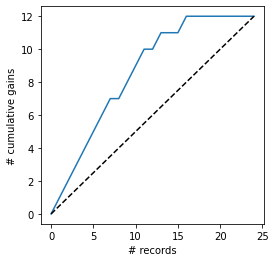

In [20]:
##Draw Lift Chart

#‘gainsChart()’  create a gains chart using predicted values
#Gain and Lift charts are used to measure the performance of the predictive classification model


from dmba import gainsChart
df = pd.read_csv('liftExample.csv')
df = df.sort_values(by=['prob'], ascending=False)
gainsChart(df.actual, figsize=(4, 4))

#if we use our model to choose the top 10 records, the curve tells us that we would be right for about nine of them. If we simply select 10 records at random, we expect to be right for 10 × 12/24 = 5 records.


### Decile Chart

<AxesSubplot:title={'center':'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

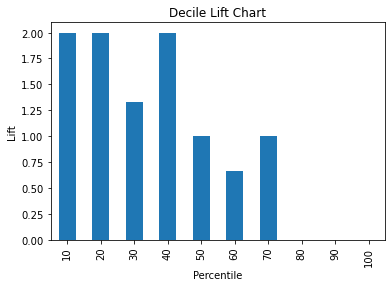

In [21]:
## Draw Decile Chart

from dmba import liftChart
df = pd.read_csv('liftExample.csv')
df = df.sort_values(by=['prob'], ascending=False)
liftChart(df.actual, labelBars=False)

#In this example, the decile lift chart indicates that we can even use the model to select the top 40% records with the highest propensities and still perform almost twice as well asrandom.
